<a href="https://colab.research.google.com/github/aswani9990/ML-Unsupervised-Project-Netflix-Movie-And-TV-Shows/blob/main/Ashwani_Kumar_Unsupervised_ML_Project_on_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name** -NETFLIX MOVIES AND TV SHOWS CLUSTERING

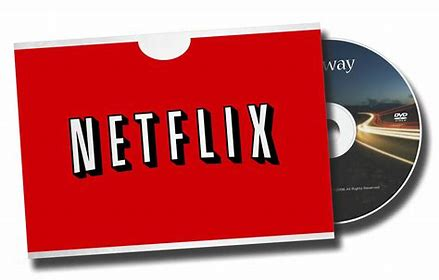

**Project Type** - Unsupervised 

Contribution - Team

Team Member 1 - Ashwani Kumar

Team Member 2 - Shahbaz Khan

Team Member 3 - Abhishek 

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here- https://github.com/aswani9990/ML-Unsupervised-Project-Netflix-Movie-And-TV-Shows

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>Task
 <br>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**Some Steps Involved in our Project**



### <font size="+2" color='#a30762'><b><i><u>Steps</u>
* <font size="+2" color='#053c96'> <b>Importing Libraries
* <font size="+2" color='#053c96'> <b>Import Data
* <font size="+2" color='#053c96'> <b>Data Summary
* <font size="+2" color='#053c96'> <b>Data Visualization
* <font size="+2" color='#053c96'> <b>Data Cleaning ( EDA )
* <font size="+2" color='#053c96'> <b>Feature Selection
* <font size="+2" color='#053c96'> <b> Model Selection
* <font size="+2" color='#053c96'><b> Hyperparameter Tuning
* <font size="+2" color='#053c96'><b>Conclusion


# **Let's Begin !**

1. Know Your Data

##  <font size="+2" color='#947318'> <b>1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


##  <font size="+2" color='#947318'> <b>2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Preliminary Analysis**

Dataset Loading

In [ ]:
working_path = "/content/drive/MyDrive/Ashwani ML Unsupervised Project on Netflix Movies and TV shows /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(working_path)


##  <font size="+2" color='#947318'> <b>3. Basic Data Exploration 

### 3.1 df.head()

In [ ]:
df.head()

### 3.2 df.shape

In [ ]:
df.shape

### 3.3 df.info()

In [ ]:
df.info(memory_usage = 'deep' )

### 3.4 df.columns

In [ ]:
df.columns

### 3.5 Defining *DataInfoAll*

In [ ]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [ ]:
DataInfoAll(df)

### 3.6  Checking duplicate values

In [ ]:
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

* No duplicate values present in this dataset.

##  <font size="+2" color='#154085'> <b>4. Data Cleaning & Data Visualization

### 4.1 Checking NaN values

In [ ]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values


* Ploting the null values present in the dataset


In [ ]:
plot_nan = df.isna()
plot_nan.head(2)

In [ ]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

* Using barplot to check the no of NaN values present in this dataset

In [ ]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

director and cast contains large number of null values so we will drop it


### 4.2 Dropping irrelevent features 

In [ ]:
df.drop(['director','cast'],axis=1, inplace=True)

### 4.3 Looking NaN values on data_added 

In [ ]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

In [ ]:
data_added_NaN.shape

* There are only 10 observations which are containing NaN values in *data_added* column

In [ ]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

### 4.4 Looking for unique values

In [ ]:
df.nunique()

* Unique values of *type* column

In [ ]:
df['type'].unique()

* ### <b><i>4.5 Production Growth </b> based on type of the content & release_year  

In [ ]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_movies.head()

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

* ### 4.6 **release_year**

* #### 4.6.1 Let's see all unique values present in *release_year* 

In [ ]:
df['release_year'].unique()

* #### 4.6.2 Checking the Datatype of *release_year* column

In [ ]:
type(df['release_year'][0])

* #### 4.6.3 value_count is on release_year

In [ ]:
df['release_year'].value_counts().to_frame().T

* #### 4.6.4 Checking **outliers** on *release_year* column

In [ ]:
sns.boxplot(df.release_year)

* As we have seen earlier **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why it's showing those values*(release_year less than 2009)* as outliers 

In [ ]:
type(df.release_year[0])

* #### 4.6.5 Replacing outliers with mean value

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

* we don't have have any release_year which is greater than 2018

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]                                            

In [ ]:
release_year_outliers

In [ ]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

* #### 4.6.6 Boxplot for release_year 

In [ ]:
df.release_year.describe()

In [ ]:
sns.boxplot(df.release_year)

In [ ]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

* ### <b>4.7 Title 

* #### 4.7.1 No of unique title present in title column

In [ ]:
df.title.nunique()

In [ ]:
df.shape[0]

* All the values present in Title are unique

* #### 4.7.2 Most occured word in *Title* ??

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### **Inference:** 
<br>It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time .
The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.


### 4.8 **Countries** producing most number of contents

* #### 4.8.1 Checking no of unique values present in Country ?

In [ ]:
df.country.nunique()

* As you can see there are total 681 countries which are produce movies / tv shows

* #### 4.8.2 Using *value_counts()*

In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

* #### 4.8.2 Check no of NaN values

In [ ]:
df.country.isna().sum()

* Let's replace those NaN values with mode value

In [ ]:
#mode value of country column
df.country.mode()[0]

In [ ]:
df.country[df.country.isna()] = df.country.mode()[0]

In [ ]:
df.country[df.country.isna()]

In [ ]:
df.country.isna().sum()

* Now there is no NaN values present

* #### 4.8.3 Looking for countries and number of netflix productions

In [ ]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country[:5]

* #### 4.8.4 Creating a new DataFrame *country_df*

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 5 countries
top_countries=country_df.head()
top_countries

In [ ]:
top_countries.T

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

* ### 4.9 **Type** 

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

* #### Most of the contents are Movies
* #### Less than ⅓ content are Tv Shows


* ### 4.10 **duration**

* #### 4.10.1 Checking NaN values

In [ ]:
df.duration.isna().sum()

* There is no NaN value present.

* #### 4.10.2 Checking datatype 

In [ ]:
type(df.duration.iloc[0][0])

* #### 4.10.3 How many unique values present in duration column ??

In [ ]:
df.duration.nunique()

* #### 4.10.4 Using *value_count()* method

In [ ]:
df.duration.value_counts().to_frame().T

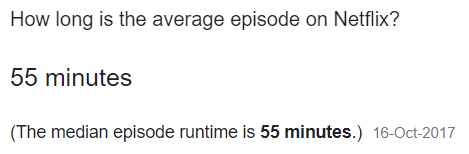

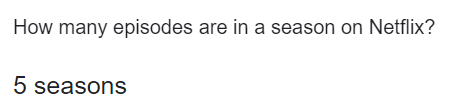

* #### 4.10.4 define *convert_seasons_to_min*

In [ ]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [ ]:
#Checking the function
convert_seasons_to_min("4 Seasons")

**"4 Seasons"** : <br>
4 Seasons = (4*5) or 20 episodes<br>
Each episode avg. time is 55 mins.<br>
Total time (in minutes. ) = (55*20) min<br> = 1100 mins
                         

* #### 4.10.5 define *all_the_duration_in_minutes*

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list 

In [ ]:
df.duration.value_counts().to_frame().T

In [ ]:
all_the_duration_in_minutes()

In [ ]:
df.duration.value_counts().to_frame().T

* #### 4.10.6 Analysis on the duration of the movies

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

* Most content are about 70 to 120 min duration for movies

* #### 4.10.7 Analysis on the duration of the TV-Shows

In [ ]:
df['type'].value_counts()

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

### 4.11 **listed_in**

* #### 4.11.1 How many unique values present in listed_in ??

In [ ]:
df.listed_in.nunique()

There are all total 491 unique values present

* #### 4.11.2 How many NaN values present in *listed_in* ?

In [ ]:
df.listed_in.isna().sum()

There is no NaN values present

* #### 4.11.2 Value_counts()

In [ ]:
df.listed_in.value_counts().to_frame().T

* #### 4.11.3 Making **Categories**

In [ ]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

In [ ]:
len(categories)

In [ ]:
len(set(categories))

There are **42 unique categories**  present & in this dataset **all the categories occured in total 17051 times**

Creating a dictionary **( *category_wise_count* )** where for each category there will be a value which basically tells us how many times that particular category occured

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
category_wise_count

* Sorting *category_wise_count* by value

In [ ]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

* Top 5 least occurred category

In [ ]:
sorted_category_wise_count[:5]

* Top 5 most occurred category 

In [ ]:
sorted_category_wise_count[-5:]

* Top 10 most occurred categories 

In [ ]:
 top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [ ]:
top_10_most_occurred_categories

In [ ]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [ ]:
top_10_most_occurred_category_name

In [ ]:
top_10_most_occurred_category_count

* #### 4.11.4 **TOP 10 Most Occurred Category By Count**

In [ ]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

* #### 4.11.5 Creating a new column **no_of_category**

* Datatype of listed_in values

In [ ]:
type(df.listed_in.iloc[0])

In [ ]:
(df.listed_in.iloc[0])

In [ ]:
(df.listed_in.iloc[0]).split(",")

In [ ]:
len((df.listed_in.iloc[0]).split(","))

In [ ]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:
df['no_of_category'] = no_of_category

In [ ]:
df[['listed_in' , 'no_of_category']].head()

* #### 4.11.6 Histogram of *no_of_category* using *listed_in*

In [ ]:
df.no_of_category.unique()

In [ ]:
df.no_of_category.value_counts()

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

* ### 4.12 Creating a new column **date_added_month** using *date_added* column

In [ ]:
df.date_added.head(3)

In [ ]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

In [ ]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

In [ ]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

In [ ]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

* We can say that December is the holiday season and it also has Christmas, so in that month most of the content got uploaded.


In [ ]:
df.date_added_month.value_counts().to_frame().T

* ### 4.13 **show_id**

In [ ]:
df.columns

* #### 4.13.1 Checking NaN values

In [ ]:
df.show_id.isna().sum()

There is no NaN value present in show_id

* #### 4.13.2 Using *value_counts()*

In [ ]:
df.show_id.value_counts()

In [ ]:
df.shape[0]

All the *show_id* is **unique**

* #### 4.13.3 Checking datatype

In [ ]:
type(df.show_id.iloc[0])

In [ ]:
df.rating.value_counts()

* #### 4.13.4 Most popular *TV-Shows Rating* 

In [ ]:
df['type'].unique()

In [ ]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

* #### 4.13.5 Most popular *Movies Rating* 

In [ ]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

Most of the contents got ratings like
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested  )
* NR ( Not Rated )


## <font size="+2" color='#154085'><b>5. Data Prepreation *(nlp data)*

### 5.1 **description**

In [ ]:
df.columns

In [ ]:
df.description.iloc[0]

In [ ]:
First_des = df.description.iloc[0]
First_des

* #### 5.1.1 Importing necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

* **Download nltk**

In [ ]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


* #### <b>5.1.2 Removing punctuations

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

* #### <b> 5.1.3 Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

In [ ]:
print("Number of stopwords in english : ", len(sw))

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

Now all the values of description are punctutation free ans stopword free

* #### 5.1.4 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

* Creating a new *DataFrame* **vocab_before_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head(4)

In [ ]:
vocab_before_stemming.head(20).T

In [ ]:
vocab_before_stemming.tail(4)

* TOP 10 most occurred words

In [ ]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.5 Now will use **SnowballStemmer( 'english' )**

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

* #### 5.1.6 Now again will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.7 Adding a new column **length** which will contain length of description

In [ ]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [ ]:
df.head(3)

In [ ]:
df.description.iloc[0]

In [ ]:
len(df.description.iloc[0])

* ### 5.2 **listed_in**

* #### 5.2.1 Removing punctutations

In [ ]:
df.columns

In [ ]:
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

* #### 5.2.2 Removing stopwords

In [ ]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

* #### 5.2.3 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
listed_in_vocab_before_stem.head()

In [ ]:
listed_in_vocab_before_stem.tail()

* TOP 10 most occurred words in listed in

In [ ]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [ ]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

In [ ]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

* #### 5.2.4 Now will use **SnowballStemmer( 'english' )**

In [ ]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

* #### 5.2.5 Now will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming_listed_in**

In [ ]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

In [ ]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

* Plot of the top vocab present in listed_in (after stemming) 

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

* #### 5.2.6 Adding a new column **length( listed-in )** which will contain length of listed_in

In [ ]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

In [ ]:
df.columns

In [ ]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

* ## <b>6. Applying Different Clustering Algorithms

<b><u>Clustering</b></u>: -<br>
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

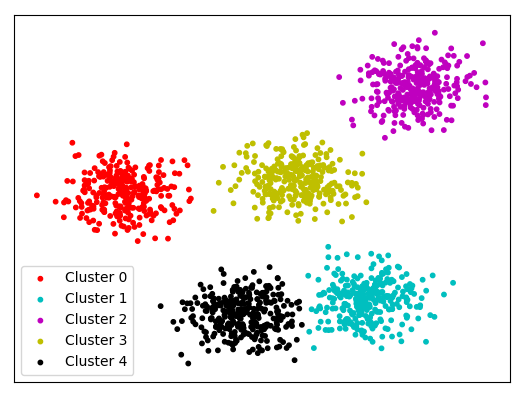

* ## <b>Five*(5)* Clustering algo I have used
* ### <b>1. Silhouette score
* ### <b> 2. Elbow Method
* ### <b>3. DBSCAN
* ### <b>4. Dendrogram
* ### <b> 5. AgglomerativeClustering

* ### <b>6.1 Silhouette score

In [ ]:
df.columns

In [ ]:
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
X_features_rec.describe()

In [ ]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

* <b>NOTE :-</b><br>
The value of the silhouette coefﬁcient is between [-1, 1]. **A score of 1 denotes the best meaning that the data point i is very compact within the cluster** to which it belongs and far away from the other clusters. *The worst value is -1*. Values near 0 denote overlapping clusters

In [ ]:

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:<br>
* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
<br>
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

<br>The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

* ### <b> 6.2 Elbow Method

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Will be using **3 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* ### <b>6.3 DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

The black colour dots(*) are noise

* ### <b> 6.4 Dendrogram

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold**

**No. of Cluster = 3**

* ### <b> 6.5 AgglomerativeClustering

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

## <font size='+2' color = '#154085'> <B>Conclusion</b>

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.

3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)

4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020

5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.

6. Most of the movies are belonging to 3 categories

7. TOP 3 content categories are International movies , dramas , comedies.

8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.

9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.

10. By applying different clustering algorithms to our dataset .we get the optimal number of
cluster is equal to 3


## **Futue Scope**

*   From this clustering analysis we can create Netflix movies and tv shows recommendation system & also we can use topic modeling. 
*   More Post Cluster Analysis

*   Integrate Netflix dataset with other data set and present more insights and clusters.
*   We could have done some research on recommendation system.




**Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**

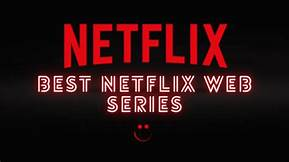